Tip:
> This work done by **Ahmad Elnassag** from reading `Hands_on Machine Learning` Book




# Dataset From Kaggle

In [2]:
def kaggle_API():
  if getattr(kaggle_API, 'has_run', False):
    return
  kaggle_API.has_run = True
  from google.colab import files
  files.upload() # Browse for the kaggle.json file that you downloaded

  # Make directory named kaggle, copy kaggle.json file there, and change the permissions of the file.
  ! mkdir ~/.kaggle
  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json

  # You can check if everything's okay by running this command.
  #! kaggle datasets list

  # Download and unzip #Dataset  into 'colab' using API command -> don`t forget using "--unzip ""
  ! kaggle datasets download -d camnugent/california-housing-prices --unzip

In [3]:
# kaggle_API() # Run For Colab

### Import Libraries 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#%matplotlib inline # only in a Jupyter notebook , Displays output inline

### Get The Data

In [5]:
Housing = pd.read_csv("D:\Ahmed\Githup\Machine Learing Projects\End-to-End Prediction House Price\housing.csv")
Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Take a Quick Look at the Data Strucure

In [6]:
# Data attributes
print(list(Housing.columns))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [7]:
# quick description about the Data
Housing.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are `20640` instances in the dataset , and we have some missing value in - total_bedrooms - coulmn
, 

Also - ocean_proximity - is object coulmn

In [8]:
Housing.total_bedrooms.isnull().sum()

207

In [9]:
# veiw ocean_proximity coulmn 
Housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# Summary The numerical factor
Housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


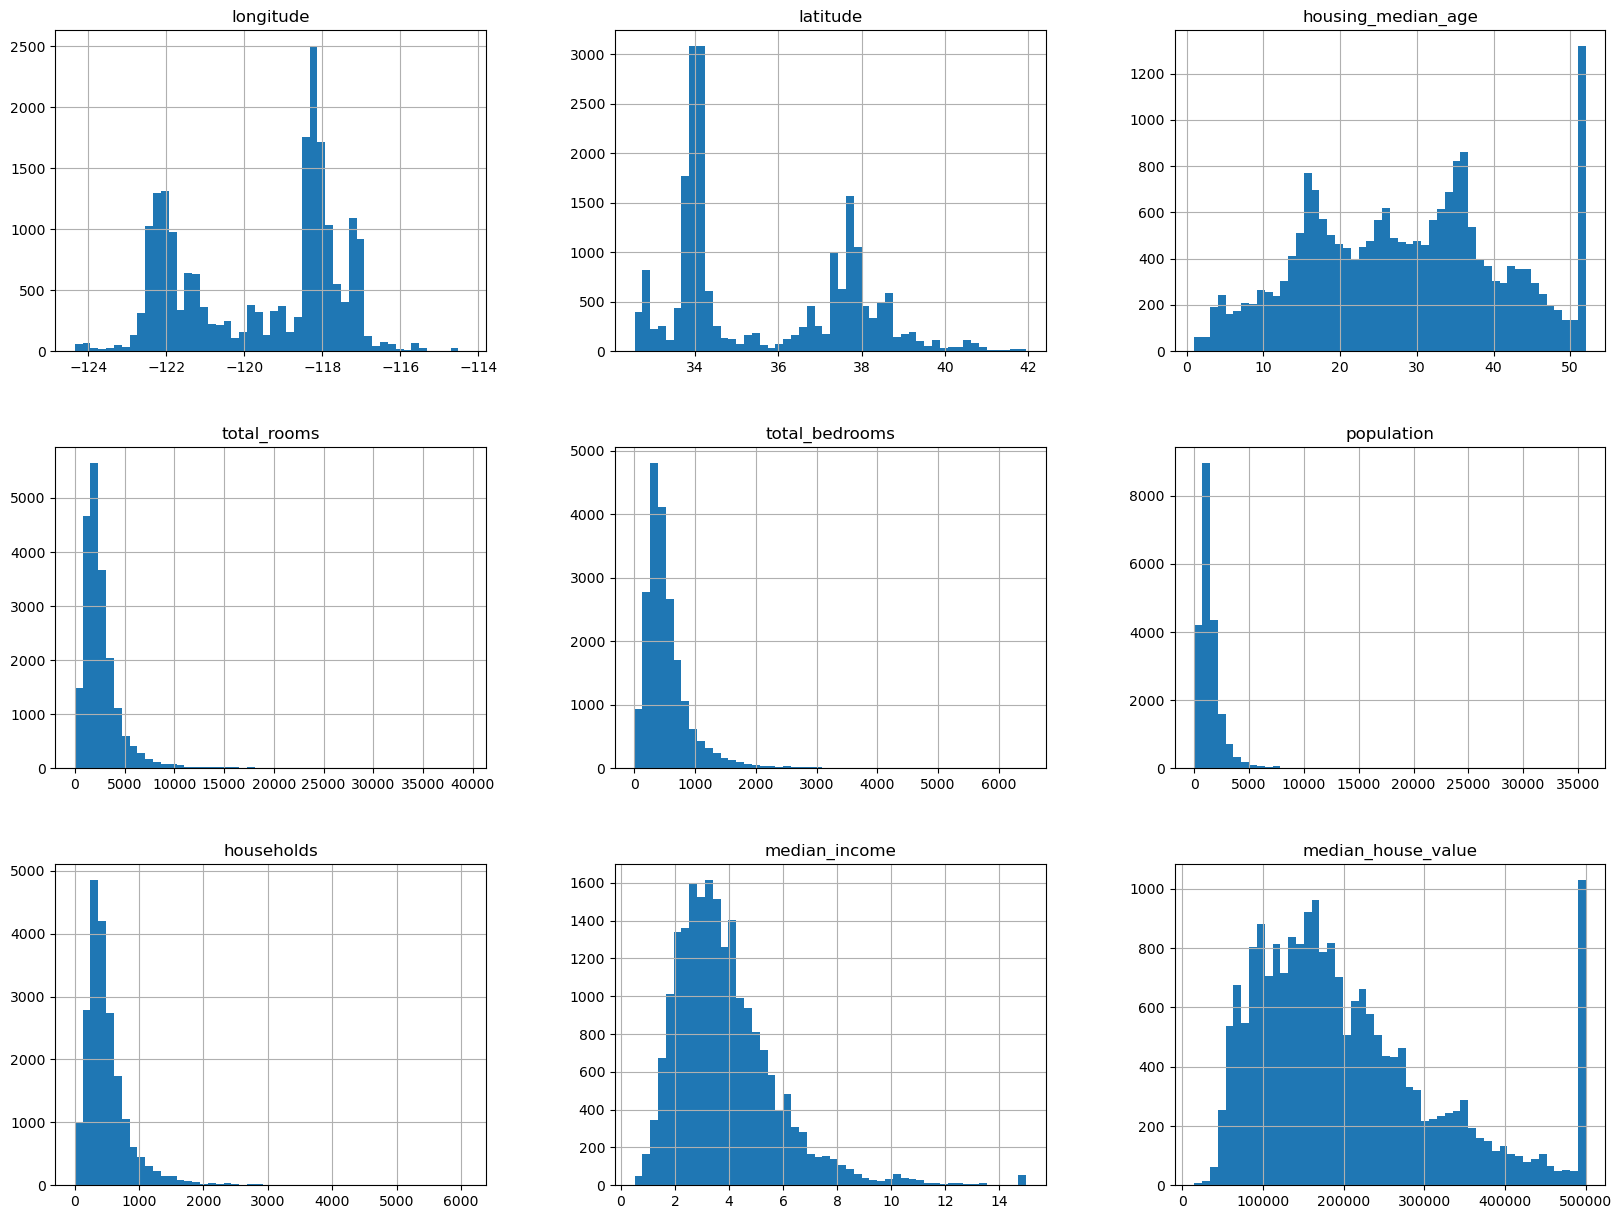

In [11]:
#plot a histogram  for  each  numerical  attribute.
Housing.hist(bins=50,figsize=(20,15))
plt.show() # show()  is  optional  in  a  Jupyter notebook

## Create a test set


In [12]:
#Function for create train and test set
def split_train_test(data , test_ratio):
  np.random.seed(42) # important to genrate the same random every time
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indeces = shuffled_indices[:test_set_size]
  train_indces = shuffled_indices[test_set_size:]
  return data.iloc[train_indces] , data.iloc[test_indeces]


In [13]:
train_set , test_set = split_train_test(Housing,0.2)

In [14]:
len(train_set)

16512

In [15]:
len(test_set)

4128

you need to ensure that the test set is representative of the various categories of incomes in the whole dataset 

<AxesSubplot:>

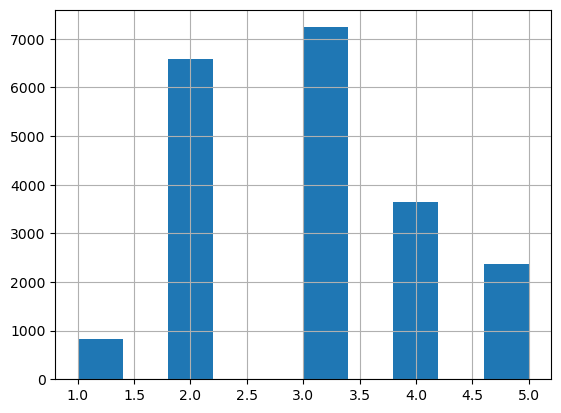

In [16]:
# create an income category attribute 
Housing['income_cat'] = pd.cut(Housing['median_income'],
                               bins = [0.,1.5,3.0,4.5,6.0,np.inf],
                               labels =[1,2,3,4,5])
Housing['income_cat'].hist()

now you are ready to do stratified sampling based on the income category

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 2, test_size = .2, random_state = 42)
for train_index, test_index, in split.split(Housing,Housing['income_cat']):
  strat_train_set = Housing.loc[train_index]
  strat_test_set = Housing.loc[test_index]
  
  

In [18]:
# see if this work as expected
print('len of train set' , len(strat_train_set))
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

len of train set 16512


3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [19]:
Housing['income_cat'].value_counts()/len(Housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [20]:
print('len of test set' , len(strat_test_set))
strat_test_set['income_cat'].value_counts()/len(strat_test_set)



len of test set 4128


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

you can see the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset

In [21]:
# for now ypu should remove the `oncome_cat` attribute from data
if 'income_cat' in strat_train_set.columns:
  for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)



### Discover and Visualize the Data

In [22]:
# to make things easy , let`s create a copy 
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

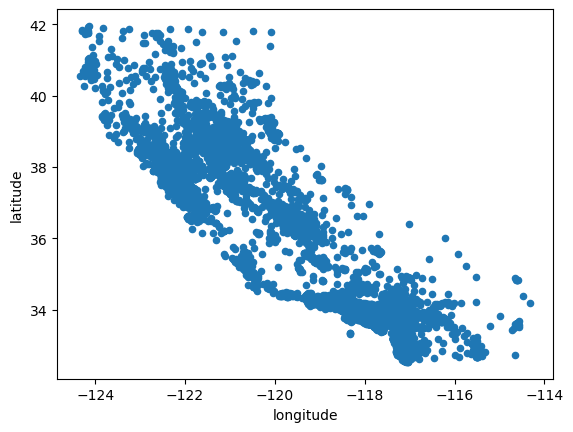

In [23]:
# create a scatter plot
housing.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

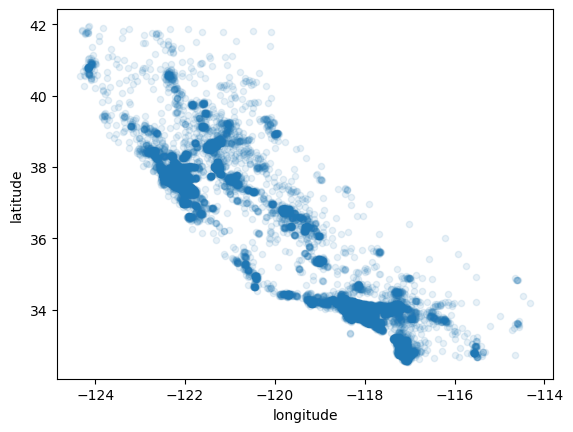

In [24]:
# setting alpha = .1 it mush easier to visualze the places where is a hisgh density
housing.plot(kind='scatter', x='longitude', y='latitude', alpha = .1)

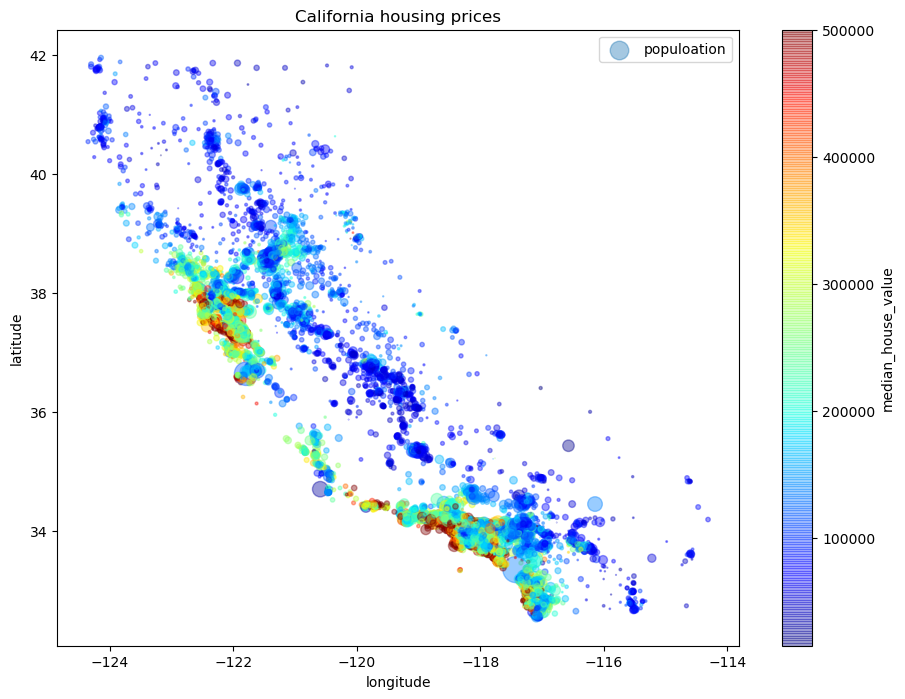

In [25]:
# now let`s look at the housing prices , size represents populoation ,
# and the color represents price
housing.plot(kind='scatter', x='longitude', y='latitude', alpha = .4,
                s = housing['population']/100, label='populoation', figsize=(11,8),
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, title='California housing prices')
plt.legend()

### looking for Correlations

In [26]:
# scine the dataset not large you can usr the `corr()
corr_matrix = housing.corr()

<AxesSubplot:>

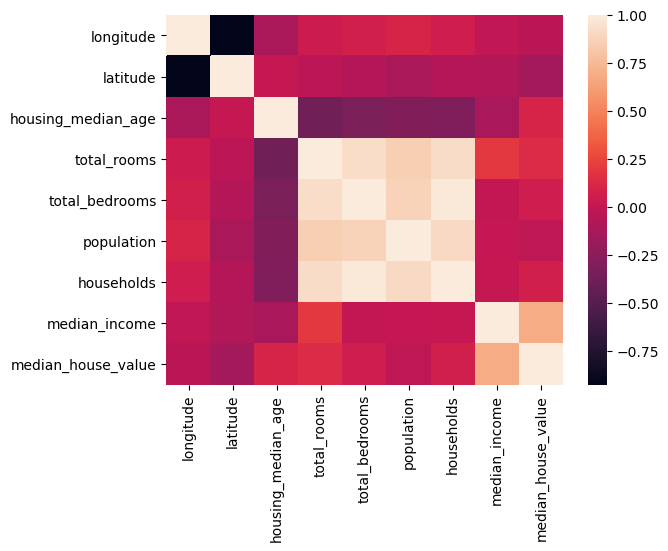

In [27]:
sns.heatmap(corr_matrix)

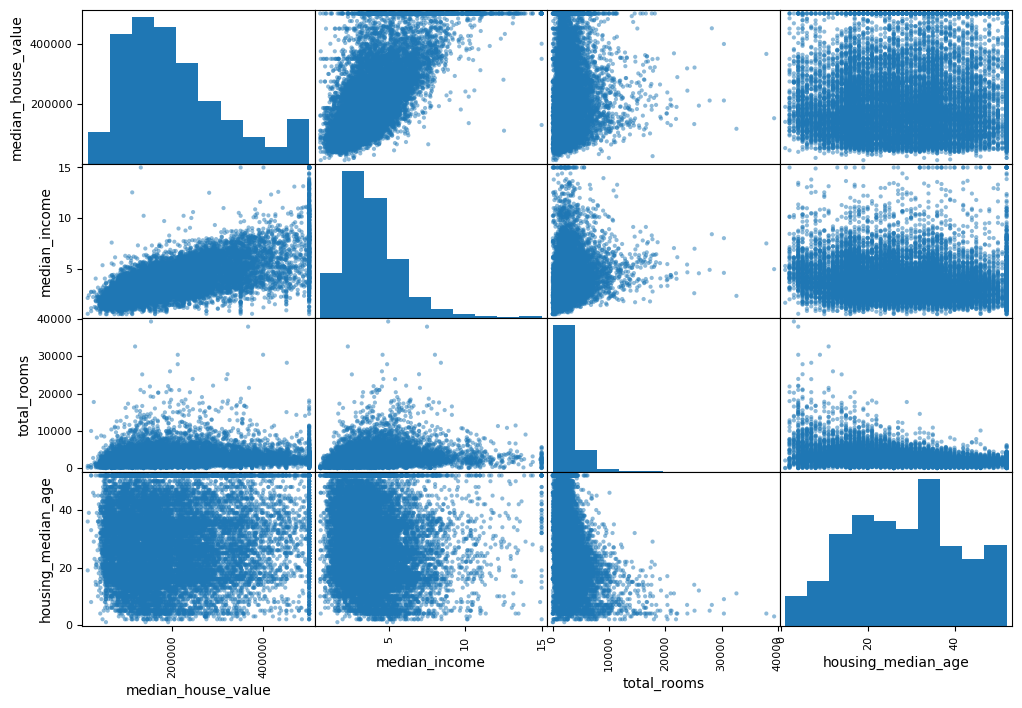

In [28]:
# another way to check correlation
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8));

# Prepare the data for ML algorithms

In [29]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [30]:
# housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
# housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]
# housing_df["population_per_household"]=housing_df["population"]/housing_df["households"]

In [31]:
# split to feature and target
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

In [32]:
# # fillna, Methods
# housing.dropna(subset =['total_bedrooms']) # Method One
# housing.drop('total_bedroom' ,axis = 1) # Method Two
# housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(),inplace=True) # Method Three


In [33]:
# Also you can use SimpleImputer From sklrean
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'median')
housing_num = housing.drop('ocean_proximity' ,axis = 1)
impute.fit(housing_num)

# print the median values for all features
impute.statistics_

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [34]:
 # Check the median values
housing_num.median().values


array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

The same median values , so the SimpleImputer work correct

In [35]:
# Transform the training set
X = impute.transform(housing_num)

# convert the X-Numpy array into pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.47,34.05,27.0,4401.0,1033.0,1725.0,962.0,4.1750
1,-121.34,38.69,17.0,1968.0,364.0,996.0,331.0,3.7031
2,-118.52,34.39,21.0,5477.0,1275.0,3384.0,1222.0,3.6625
3,-119.70,34.43,52.0,1364.0,460.0,804.0,400.0,2.3750
4,-117.07,32.74,37.0,1042.0,205.0,589.0,208.0,2.6629
...,...,...,...,...,...,...,...,...
16507,-122.14,37.73,52.0,2024.0,320.0,823.0,334.0,5.0000
16508,-122.33,38.39,36.0,831.0,122.0,272.0,109.0,6.3427
16509,-118.27,33.94,43.0,1309.0,344.0,1182.0,340.0,1.6625
16510,-122.21,37.78,43.0,1702.0,460.0,1227.0,407.0,1.7188


In [36]:
# Check if there is Missing values
housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Handling Text and Categorical Attributes

In [37]:
# Handling Text and Categorical Attributes
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
5288,<1H OCEAN
12865,INLAND
9174,<1H OCEAN
17247,<1H OCEAN
14138,NEAR OCEAN
5722,<1H OCEAN
18559,NEAR OCEAN
18488,INLAND
9796,NEAR OCEAN
19705,INLAND


In [38]:
# Method one, OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [4.]])

In [39]:
# you can get the list of Categories using "categories_"
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
# Second Method, One-hot-encoding
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
housing_cat_hot = one_hot.fit_transform(housing_cat)
housing_cat_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
pd.DataFrame(housing_cat_hot.toarray()).head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [42]:
# Easy Method With "get_dummies"
housing_cat_dummies = pd.get_dummies(housing,drop_first=True)
housing_cat_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5288,-118.47,34.05,27.0,4401.0,1033.0,1725.0,962.0,4.1750,0,0,0,0
12865,-121.34,38.69,17.0,1968.0,364.0,996.0,331.0,3.7031,1,0,0,0
9174,-118.52,34.39,21.0,5477.0,1275.0,3384.0,1222.0,3.6625,0,0,0,0
17247,-119.70,34.43,52.0,1364.0,460.0,804.0,400.0,2.3750,0,0,0,0
14138,-117.07,32.74,37.0,1042.0,205.0,589.0,208.0,2.6629,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
641,-122.14,37.73,52.0,2024.0,320.0,823.0,334.0,5.0000,0,0,1,0
9958,-122.33,38.39,36.0,831.0,122.0,272.0,109.0,6.3427,1,0,0,0
5196,-118.27,33.94,43.0,1309.0,344.0,1182.0,340.0,1.6625,0,0,0,0
245,-122.21,37.78,43.0,1702.0,460.0,1227.0,407.0,1.7188,0,0,1,0


### Custom Transformers

In [43]:
# Custom Transformers
# for example, here is a small transformer class that adds the combined attributes
from sklearn.base import BaseEstimator , TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    rooms_per_household = X[: ,rooms_ix] / X[:,households_ix ]
    population_per_household = X[:, population_ix] / X[:, households_ix]

    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:,bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Note--> This is like a Advanced Concept , Not Sure we will learn!
# This hyperpara‐ meter will allow you to easily find out 
# whether adding this attribute helps the
# Machine Learning algorithms or not. More generally, you can add a hyperparameter
# to gate any data preparation step that you are not 100% sure about. 

### Transformation Pipelines


In [44]:
# Note that Pipeline Constructor takes a list of name/estimator pairs

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)



In [45]:
# we have handled the categorical columns and the numerical columns 

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [46]:
housing_prepared.shape

(16512, 16)

In [47]:
housing_labels.shape

(16512,)

# Select and Train a Model

In [48]:
# train a Linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [49]:
# let`s try it out on a few instances from the training set
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
check = pd.DataFrame({
    "prediction":np.round(lin_reg.predict(some_data_prepared),1),
    "Labels":list(some_labels)
})
check

,prediction,Labels
0,290088.4,500001.0
1,121438.2,114300.0
2,222583.1,228100.0
3,245239.3,293800.0
4,183233.9,116900.0


In [50]:
# let`s measure this regression model "RMSE"
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68242.94567250568

Okkay! , This better than nothing.This an example of a model underfitting, or the model not Powerfull enough for the case

In [51]:
# Let`s Try a "DecisionTreeRegressor"
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions , housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Wow , But Wait This an Example of Overfitting , you must use the test data to measure the model Performance

### Evaluation Using Cross-Validation

In [52]:
# Split the training set into 10 distinct subsets called folds, then trains and  evaluates the DecisionTree Mpdel
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rms_score = np.sqrt(-scores)

# Note in cross_val_score the greet is Better opposite the loss function the low is better


In [53]:
def display_scores(scores):
  print("Scores = ",scores)
  print("Mean = ",scores.mean())
  print("Standard deviation = ",scores.std())

display_scores(tree_rms_score)

Scores =  [71658.28884682 73871.38163721 66844.48971218 66560.1214838
 73093.26865558 68873.77560611 67996.94598406 70377.16365544
 67398.58401869 69875.75129604]
Mean =  69654.97708959214
Standard deviation =  2451.756350029575


In [54]:
# let`s Compute cross_val_score for Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

Scores =  [66285.16434467 71384.56280948 67938.35903255 67815.76367685
 75102.26606191 69796.05356775 68473.09800642 65525.23763745
 65227.63476711 67740.74845836]
Mean =  68528.88883625616
Standard deviation =  2817.9055663768827


I see the `Decision Tree` Work Worse than `Linear Regression`

In [55]:
# Note TO know,
# you should save every model you expreiment with, How ?
# You can easily saving by using "Pickle Model"

import joblib
joblib.dump(lin_reg , "lin_reg.pkl")

# and later
my_model_loaded = joblib.load("lin_reg.pkl")


# Fine-Tune Your Model


### Grid Search

In [56]:
# one way to fiddle with the Hyperparameters manually
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
# Check the best params
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [58]:
# get the best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [59]:
# print all evaluation scores
cv_res = grid_search.cv_results_
for mean_score , params in zip(cv_res['mean_test_score'], cv_res['params']):
  print(np.sqrt(-mean_score),params)

64257.50681053867 {'max_features': 2, 'n_estimators': 3}
55116.32201854546 {'max_features': 2, 'n_estimators': 10}
52084.94230034515 {'max_features': 2, 'n_estimators': 30}
59834.18798891722 {'max_features': 4, 'n_estimators': 3}
52797.4234748771 {'max_features': 4, 'n_estimators': 10}
49679.45936988417 {'max_features': 4, 'n_estimators': 30}
58382.06155936909 {'max_features': 6, 'n_estimators': 3}
51859.38549073472 {'max_features': 6, 'n_estimators': 10}
49584.91761907864 {'max_features': 6, 'n_estimators': 30}
58633.201778149 {'max_features': 8, 'n_estimators': 3}
51871.69701253748 {'max_features': 8, 'n_estimators': 10}
49525.77530813179 {'max_features': 8, 'n_estimators': 30}
61948.159468246056 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53966.56182971209 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59944.133215677604 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51864.82187789705 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [60]:
# Check the feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.77956604e-02, 5.94072710e-02, 4.35506902e-02, 1.50960367e-02,
       1.38910060e-02, 1.51153648e-02, 1.36449178e-02, 3.54831132e-01,
       4.39077155e-02, 1.13528910e-01, 8.24318122e-02, 2.96401972e-03,
       1.67418475e-01, 2.37645757e-04, 2.25109947e-03, 3.92824426e-03])

In [61]:
# let`s Display the importance Score next to their attributes names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.3548311317037821, 'median_income'),
 (0.16741847460383566, 'INLAND'),
 (0.11352890990916069, 'pop_per_hhold'),
 (0.08243181220873612, 'bedrooms_per_room'),
 (0.06779566043864675, 'longitude'),
 (0.05940727100933415, 'latitude'),
 (0.043907715460059595, 'rooms_per_hhold'),
 (0.0435506901851319, 'housing_median_age'),
 (0.015115364776500785, 'population'),
 (0.015096036699939398, 'total_rooms'),
 (0.013891006045917816, 'total_bedrooms'),
 (0.013644917755130317, 'households'),
 (0.003928244256177995, 'NEAR OCEAN'),
 (0.0029640197215756517, '<1H OCEAN'),
 (0.002251099469260186, 'NEAR BAY'),
 (0.00023764575681086631, 'ISLAND')]

# Evaluate Your system on the Test set

In [62]:
from sklearn.metrics import  r2_score
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

x_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 =  r2_score(y_test, final_predictions)
print("RMSE = ",final_rmse)
print("r2_score = ",final_r2)

RMSE =  49938.31316694875
r2_score =  0.8133653040306607


# Just For Fun "LazyPredict"

In [66]:
! pip install lazypredict

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)
  Using cached lightgbm-3.3.3-py3-none-win_amd64.whl (1.0 MB)


In [67]:
from lazypredict.Supervised import LazyRegressor
lazy = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
Models, Predictions = lazy.fit(housing_prepared,x_test_prepared, housing_labels, y_test);

100%|██████████| 41/41 [04:10<00:00,  6.12s/it]


In [68]:
Models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.84,0.84,46415.18,0.31
XGBRegressor,0.84,0.84,46723.94,1.93
HistGradientBoostingRegressor,0.84,0.84,46749.97,1.13
RandomForestRegressor,0.81,0.81,50220.15,10.32
ExtraTreesRegressor,0.81,0.81,50699.20,4.14
BaggingRegressor,0.79,0.80,52254.38,1.13
GradientBoostingRegressor,0.78,0.78,53651.32,3.96
KNeighborsRegressor,0.72,0.72,61384.51,1.37
LassoLarsCV,0.64,0.64,69102.52,0.12
